In [3]:
#파이썬으로 상관분석, 회귀분석 테스트
import numpy as np
import pandas as pd

#csv 파일 읽어오기
hdr = ['V1','V2','V3','V4','V5','V6','V7','V8','V9']
df = pd.read_csv('c:/Java/phone-02.csv', header=None, names=hdr)
print(df)

      V1    V2   V3  V4   V5  V6   V7   V8    V9
0   2015  2015  5.0  45  173  75   60  500   100
1   2014  2015  4.5  27  176  59   70   30    50
2   2015  2015  5.0  29  183  65  120  300   200
3   2015  2016  5.0  28  172  63   80   60   190
4   2015  2015  5.0  24  179  65   90   30   500
5   2016  2016  5.5  34  175  73   80  480   160
6   2016  2016  6.0  40  169  77   60  300   170
7   2014  2014  5.0  40  182  82   50   60    50
8   2014  2014  4.5  30  175  70  100   90   300
9   2015  2015  5.0  42  177  79   40  480    30
10  2014  2014  4.5  32  167  62  130  300   400
11  2015  2015  5.5  37  171  70   90  360   200
12  2015  2015  5.5  35  173  69   60  120   150
13  2015  2016  6.0  41  181  88   60  120   130
14  2015  2015  5.5  40  178  89   70   60   140
15  2015  2015  5.0  35  169  70   50   90    80
16  2016  2016  5.5  35  184  72   90   90    70
17  2016  2016  6.0  34  176  71   90   60   130
18  2015  2015  4.5  29  188  83  140  240   600
19  2016  2016  5.5 

In [4]:

#상관 분석 실시
dfc = df.corr()
print(dfc)

          V1        V2        V3        V4        V5        V6        V7  \
V1  1.000000  0.875755  0.752180 -0.057010  0.102323  0.166902 -0.096836   
V2  0.875755  1.000000  0.723747 -0.093357  0.093573  0.096822 -0.175814   
V3  0.752180  0.723747  1.000000  0.239556 -0.034477  0.338715 -0.282315   
V4 -0.057010 -0.093357  0.239556  1.000000 -0.213501  0.489606 -0.536855   
V5  0.102323  0.093573 -0.034477 -0.213501  1.000000  0.408851  0.225963   
V6  0.166902  0.096822  0.338715  0.489606  0.408851  1.000000 -0.045841   
V7 -0.096836 -0.175814 -0.282315 -0.536855  0.225963 -0.045841  1.000000   
V8  0.081391 -0.049020 -0.059084  0.509728 -0.243432  0.056084 -0.099183   
V9  0.004434 -0.095588 -0.135595 -0.583759  0.203416  0.117825  0.842554   

          V8        V9  
V1  0.081391  0.004434  
V2 -0.049020 -0.095588  
V3 -0.059084 -0.135595  
V4  0.509728 -0.583759  
V5 -0.243432  0.203416  
V6  0.056084  0.117825  
V7 -0.099183  0.842554  
V8  1.000000 -0.222825  
V9 -0.222825  

In [5]:
# df97 = df['V9'].corr(df['V7'])
df97 = df.V9.corr(df.V7)
print('핸드폰 사용량-데이터 소모량 관계',df97)

핸드폰 사용량-데이터 소모량 관계 0.84255392345921


In [8]:
#회귀분석
from scipy import stats
lm = stats.linregress(df.V7, df.V9)
#기울기, 절편, 상관계수, 오류지수p, 표준오차
print(lm)

#회귀식 : y = 절편 + 기울기x

LinregressResult(slope=6.282598387861545, intercept=-272.0009483167378, rvalue=0.84255392345921, pvalue=2.405151755765765e-07, stderr=0.8562612243672811)


예측전기 사용량 : 2.901994372142104


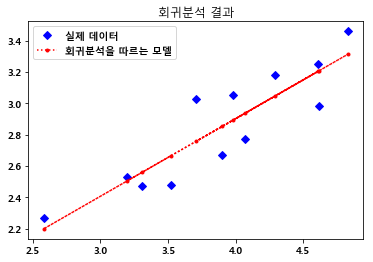

In [63]:
#어떤 공장의 월별 생산량x과 전기사용량y을 이용해서 회귀분석
from scipy import polyval
#x:독립변수, y:종속변수
make = [3.52,2.58,3.31,4.07,4.62,3.98,4.29,4.83,3.71,4.61,3.90,3.20] #단위 :억

power = [2.48,2.27,2.47,2.77,2.98,3.05,3.18,3.46,3.03,3.25,2.67,2.53]

data = {'매출':make, '전기':power}
mp = pd.DataFrame(data,index=[1,2,3,4,5,6,7,8,9,10,11,12])

기울기, 절편, 상관계수, p값, 표준오차 = stats.linregress(mp.매출,mp.전기)

#매출이 4억이면 전기사용량은 아마도?
예측전기사용량 = 절편 + 기울기 * 4
print('예측전기 사용량 :', 예측전기사용량)   #2.9

import matplotlib.pyplot as plt
import matplotlib as mp

krfont = {'family':'Malgun Gothic', 'weight':'bold', 'size':10}
mp.rc('font',**krfont)

ry = polyval([기울기, 절편], make)
plt.plot(make, power, 'bD')  #파랑색 점
plt.plot(make, ry,'r.:')   #빨간색 점, 실선
plt.title('회귀분석 결과')
plt.legend(['실제 데이터', '회귀분석을 따르는 모델'])
plt.show()

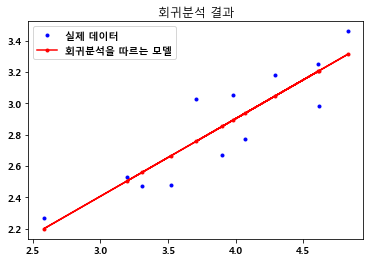

,make,power
0,3.52,2.48
1,2.58,2.27
2,3.31,2.47
3,4.07,2.77
4,4.62,2.98
5,3.98,3.05
6,4.29,3.18
7,4.83,3.46
8,3.71,3.03
9,4.61,3.25
